# Local outlier factor

Алгоритм Local Outlier Factor (LOF) - это метод неконтролируемого обнаружения аномалий, который вычисляет локальное отклонение плотности данной точки данных по отношению к ее соседям.

### Импортируем библиотеки

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline

## Сгенерируем случайные данные

### инициируем новый генератор

In [4]:
np.random.seed(42)

### Сгенерируем тренировочную выборку (inliners)

In [5]:
X_inliners = 0.3 * np.random.randn(100,2)

In [6]:
X_inliners = np.r_[X_inliners +2, X_inliners -2]

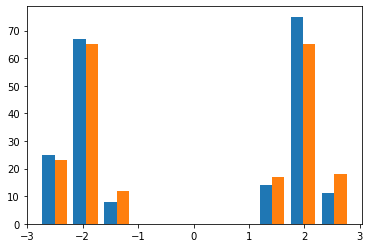

In [7]:
plt.hist(X_inliners)
plt.show()

## Сгенерируем аномалии (выбросы - outliers)

In [10]:
X_outliers = np.random.uniform(low = -4, high = 4, size = (20,2))
X = np.r_[X_inliners, X_outliers]

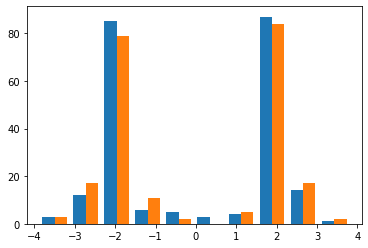

In [11]:
plt.hist(X)
plt.show()

## Подчтитаем количество выбросов и пометим их -1 (правильные значения: 1)

In [12]:
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype = int)
ground_truth[-n_outliers:] = -1

## Построим модель для выявления выбросов (по умолчанию соседей = 20, contamination = 0.1)

In [13]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

## Используем fit_predict для вычисления прогнозных меток тренировочных выборок

In [14]:
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()

In [15]:
X_scores = clf.negative_outlier_factor_

## отобразим диаграмму рассеяния

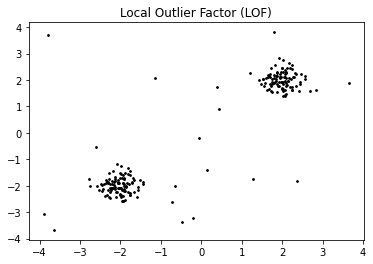

In [17]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:,0],X[:,1], color = 'k', s=3., label = 'Data points')
plt.show()

### Построим круги с радиусами, пропорциональными баллым аномальности

In [18]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.max() - X_scores.min())

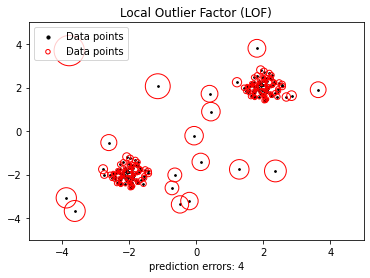

In [19]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:,0],X[:,1], color = 'k', s=3., label = 'Data points')
plt.scatter(X[:,0],X[:,1], color = 'k', s=1000*radius, edgecolors = 'r', facecolors = 'none', label = 'Data points')
plt.axis('tight')
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc = "upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()